In [1]:
%matplotlib inline

In [6]:
from matplotlib.pylab import plt
import numpy as np
import pandas as pd

legend = pd.DataFrame([
    (11, "Open Water", "#476BA0"),
    (12, "Perennial Ice/Snow", "#D1DDF9"),
    (21, "Developed, Open Space","#DDC9C9"),
    (22, "Developed, Low Intensity", "#D89382"),
    (23, "Developed, Medium Intensity", "#ED0000"),
    (24, "Developed High Intensity", "#AA0000"),
    (31, "Barren Land (Rock/Sand/Clay)", "#B2ADA3"),
    (41, "Deciduous Forest", "#68AA63"),
    (42, "Evergreen Forest", "#1C6330"),
    (43, "Mixed Forest", "#B5C98E"),
    (51, "Dwarf Scrub", "#A58C30"),
    (52, "Shrub/Scrub", "#CCBA7C"),
    (71, "Grassland/Herbaceous", "#E2E2C1"),
    (72, "Sedge/Herbaceous", "#C9C977"),
    (73, "Lichens", "#99C147"),
    (74, "Moss", "#77AD93"),
    (81, "Pasture/Hay", "#DBD83D"),
    (82, "Cultivated Crops", "#AA7028"),
    (90, "Woody Wetlands", "#BAD8EA"),
    (95, "Emergent Herbaceous Wetlands","#70A3BA")],
    columns=["Code", "Desc", "Color"])

legend

,Code,Desc,Color
0,11,Open Water,#476BA0
1,12,Perennial Ice/Snow,#D1DDF9
2,21,"Developed, Open Space",#DDC9C9
3,22,"Developed, Low Intensity",#D89382
4,23,"Developed, Medium Intensity",#ED0000
5,24,Developed High Intensity,#AA0000
6,31,Barren Land (Rock/Sand/Clay),#B2ADA3
7,41,Deciduous Forest,#68AA63
8,42,Evergreen Forest,#1C6330
9,43,Mixed Forest,#B5C98E


In [3]:
from geonotebook.wrappers import RasterData
rd = RasterData("/data/doruk/nlcd_2011_landcover_2011_edition_2014_10_10.tif")

In [5]:
colormap = legend[["Code", "Color"]].rename(columns={
    "Code": "quantity", "Color": "color"}).to_dict("records")

M.add_layer(rd[1], colormap=colormap, opacity=0.7)

In [ ]:
# M.remove_layer('nlcd_2011_landcover_2011_edition_2014_10_10')

In [8]:
l, d = M.layers.annotation.rectangles[0].data.next()

In [9]:
d.shape

(548, 1079)

In [58]:
l, d = M.layers.annotation.rectangles[2].data.next()
with open("/tmp/foo", "wb") as fh:
    fh.write(d)

In [44]:
df = pd.DataFrame({"Code": d.data.ravel()})
df["Count"] = 1
df = df.groupby("Code").sum().join(legend.set_index("Code"))\
    .sort_values("Count", ascending=False)
df

,Count,Desc,Color
Code,,,
11,176499,Open Water,#476BA0
71,103348,Grassland/Herbaceous,#E2E2C1
23,82262,"Developed, Medium Intensity",#ED0000
22,62203,"Developed, Low Intensity",#D89382
21,55996,"Developed, Open Space",#DDC9C9
95,50829,Emergent Herbaceous Wetlands,#70A3BA
43,28963,Mixed Forest,#B5C98E
24,23611,Developed High Intensity,#AA0000
52,3567,Shrub/Scrub,#CCBA7C


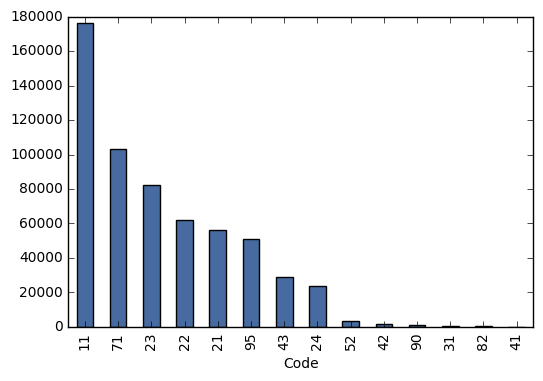

In [55]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap('nlcd', list(df['Color']), len(df))

ax = df.plot(kind='bar', legend=False, color=list(df['Color']))



In [ ]:
rd2 = RasterData('data/L57.Globe.month09.2010.hh09vv04.h6v1.doy247to273.NBAR.v3.0.tiff')

In [ ]:
M.add_layer(rd2[4])

In [ ]:
dict(list(M.layers.annotation.points[0].data))

In [ ]:
M.layers['nlcd_2011_landcover_2011_edition_2014_10_10'].points[0]